In [14]:
import yfinance as yf
import pandas as pd


Objetivo: Seleccionar un conjunto de acciones para analizar su volatilidad y evaluar el riesgo.


Definición de la muestra: Elegimos algunas acciones de empresas bien conocidas y representativas. En este caso seleccionamos: Apple (AAPL), Microsoft (MSFT), Tesla (TSLA), Amazon (AMZN)

Diversificación: Al seleccionar acciones de diferentes sectores (tecnología, automotriz, consumo), podemos comparar cómo varía el riesgo entre industrias.

Recolección de Datos
Objetivo: Obtener los precios históricos de las acciones seleccionadas. Para esto, usamos la API de Yahoo Finance.

In [48]:
acciones = ['AAPL', 'MSFT', 'TSLA', 'AMZN']
data = yf.download(acciones, start="2020-01-01", end="2024-01-01")['Adj Close']
data.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,MSFT,TSLA
Date,,,,
2020-01-02 00:00:00+00:00,72.876106,94.900497,153.938187,28.684000
2020-01-03 00:00:00+00:00,72.167603,93.748497,152.021408,29.534000
2020-01-06 00:00:00+00:00,72.742661,95.143997,152.414368,30.102667
2020-01-07 00:00:00+00:00,72.400536,95.343002,151.024673,31.270666
2020-01-08 00:00:00+00:00,73.565216,94.598503,153.430237,32.809334


In [49]:
returns = data.pct_change().dropna()

In [50]:
returns.head()

Ticker,AAPL,AMZN,MSFT,TSLA
Date,,,,
2020-01-03 00:00:00+00:00,-0.009722,-0.012139,-0.012452,0.029633
2020-01-06 00:00:00+00:00,0.007968,0.014886,0.002585,0.019255
2020-01-07 00:00:00+00:00,-0.004703,0.002092,-0.009118,0.038801
2020-01-08 00:00:00+00:00,0.016087,-0.007809,0.015928,0.049205
2020-01-09 00:00:00+00:00,0.021240,0.004799,0.012493,-0.021945


Preparación y Limpieza de Datos
Objetivo: Preparar los datos para el análisis calculando los retornos diarios.

Retornos diarios:

Los retornos diarios representan el cambio porcentual en el precio de un día al siguiente y son fundamentales para calcular la volatilidad.

In [51]:
import numpy as np

In [52]:
volatilidad_diaria = returns.std()

Volatilidad (Desviación Estándar de Retornos):

Calculamos la desviación estándar de los retornos diarios, lo cual nos da una medida de la dispersión (y por lo tanto de la volatilidad o riesgo) del precio.

In [53]:
VaR_95 = returns.quantile(0.05)

Value at Risk (VaR):

El VaR al 95% es el valor máximo de pérdida que se espera con un 95% de confianza en un día específico. Esto significa que hay solo un 5% de probabilidad de que las pérdidas excedan este valor en un día.

In [54]:
volatilidad_diaria, VaR_95

(Ticker
 AAPL    0.021146
 AMZN    0.023741
 MSFT    0.020546
 TSLA    0.042902
 dtype: float64,
 Ticker
 AAPL   -0.032406
 AMZN   -0.035522
 MSFT   -0.029482
 TSLA   -0.064069
 Name: 0.05, dtype: float64)

In [59]:
resultados = pd.DataFrame({
    'Volatilidad Diaria': volatilidad_diaria,
    'VaR al 95%': VaR_95
})

print(resultados)

        Volatilidad Diaria  VaR al 95%
Ticker                                
AAPL              0.021146   -0.032406
AMZN              0.023741   -0.035522
MSFT              0.020546   -0.029482
TSLA              0.042902   -0.064069


In [55]:
import matplotlib.pyplot as plt


Visualización de Resultados
Objetivo: Representar los datos para visualizar la volatilidad y el comportamiento de los precios.

Gráfico de precios históricos:

Ayuda a ver la evolución del precio en el tiempo para cada acción.

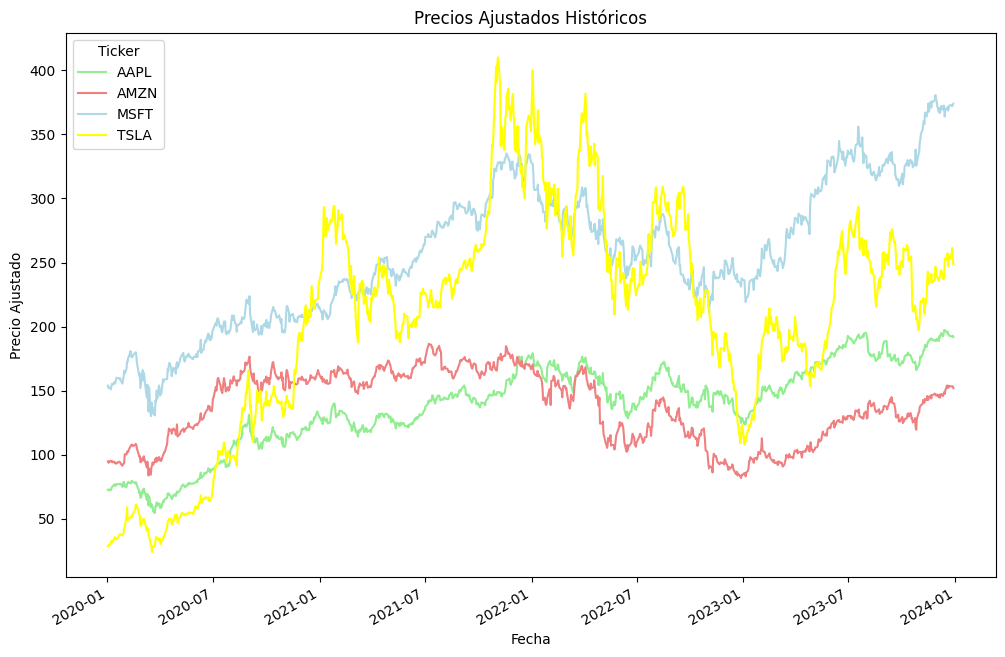

In [56]:
colores = ['lightgreen', 'lightcoral', 'lightblue', '#FFFF00']
data.plot(figsize=(12, 8), title="Precios Ajustados Históricos", color = colores)
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado")
plt.show()

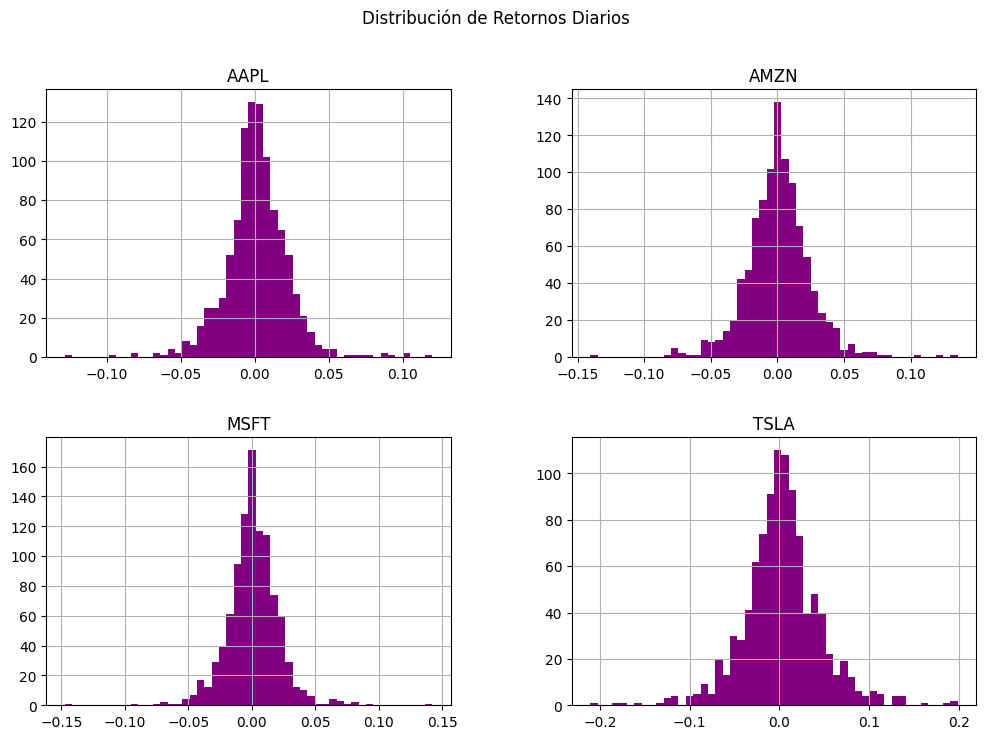

In [57]:
returns.hist(bins=50, figsize=(12, 8), color = '#800080')
plt.suptitle("Distribución de Retornos Diarios")
plt.show()

Histograma de retornos:

Representa la distribución de los retornos diarios y permite ver la probabilidad de ganancias y pérdidas. Los retornos más extremos indican mayor riesgo.

INTERPRETACION

TSLA tiene la volatilidad diaria más alta (4.29%), lo que indica que el precio de las acciones de Tesla es más variable y está sujeto a cambios significativos de un día para otro. Esto refleja un alto nivel de riesgo asociado con esta acción.
AMZN (2.37%) y AAPL (2.11%) tienen volatilidades moderadas, mientras que MSFT (2.05%) es la menos volátil entre las cuatro. Esto sugiere que las acciones de Microsoft son más estables en comparación con las demás.

TSLA tiene el VaR más negativo (-6.41%), lo que significa que existe un 95% de probabilidad de que en un solo día, la acción de Tesla no pierda más del 6.41% de su valor. Este alto VaR refuerza la idea de que TSLA es la más riesgosa de las acciones analizadas.
AMZN (-3.55%) también muestra un riesgo considerable, seguido de AAPL (-3.24%).
MSFT tiene el VaR menos negativo (-2.95%), lo que indica que es la acción más segura entre las cuatro, con menor probabilidad de pérdidas significativas en un día típico.

CONCLUSIONES

TSLA:

Volatilidad Alta (4.29%): Altamente inestable y con grandes cambios diarios.
VaR Alto (-6.41%): Mayor riesgo de pérdidas en un solo día.
AMZN:

Volatilidad Moderada (2.37%): Más variable que AAPL y MSFT, pero menos que TSLA.
VaR Moderado (-3.55%): Riesgo significativo de pérdida, pero menor que TSLA.
AAPL:

Volatilidad Moderada (2.11%): Comparativamente más estable, pero aún variable.
VaR Moderado (-3.24%): Riesgo de pérdida considerable, pero menor que AMZN y TSLA.
MSFT:

Volatilidad Baja (2.05%): Acción más estable.
VaR Bajo (-2.95%): Menor riesgo de pérdida en comparación con las otras acciones.


Perfil de Inversión: Si eres un inversor conservador, podrías optar por acciones como MSFT que presentan menos volatilidad y menor riesgo. Si buscas maximizar retornos y estás dispuesto a asumir un riesgo mayor, podrías considerar TSLA.